In [1]:

library(Rsamtools)
library(GenomicRanges)
require(Matrix)
library(ggplot2)
library(gplots)
#source('/data/home/mpg22/scripts/create_typhoon_plot_functions_sacCer3genetablemodified.R')
library(repr) # library to resize the plots 
#install.packages("viridis")
library(viridis) #The viridis color palettes
library(RColorBrewer)
library(pastecs)
library(quantmod)




Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading required package: IRanges
Loading required package: GenomeInfoDb
L

In [2]:
#runned the code on the command line 
chr_nuc_ratios.df <- read.csv('~/March_2017_chromatin_assembly/Merged_data/data_frames/chr_nuc_ratios_allreads_tpfixed_6_21_17.csv',
                             stringsAsFactors=F)

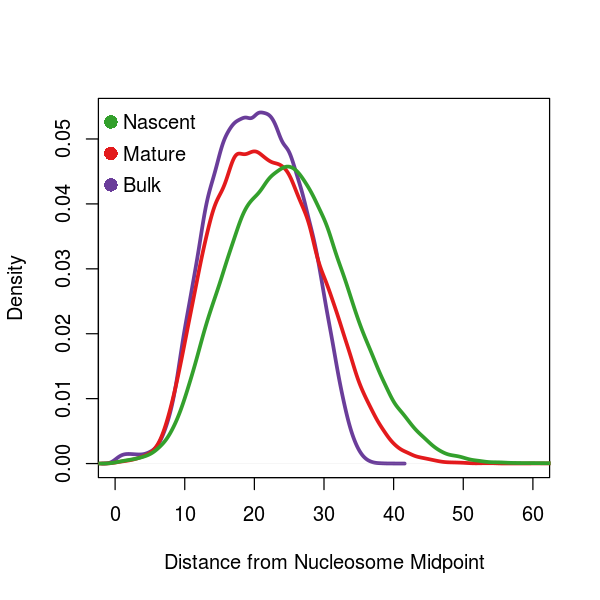

In [287]:

options(repr.plot.width=5, repr.plot.height=5)

cl <- brewer.pal(12, "Paired")
plot(density(chr_nuc_ratios.df$Bnuc_mdpAv, na.rm = T), col=cl[10], lwd="3", main=" ",
     xlab="Distance from Nucleosome Midpoint", xlim=c(0,60))
lines(density(chr_nuc_ratios.df$Mnuc_mdpAv., na.rm = T), col=cl[6], lwd="3")
lines(density(chr_nuc_ratios.df$Nnuc_mdpAv, na.rm = T), col=cl[4],lwd="3")
legend('topleft', col=c(cl[4], cl[6],cl[10]), c("Nascent", "Mature", "Bulk"),pch=c(16,16),
        pt.cex=1.5,cex=1, 
       bty = "n", y.intersp=2, x.intersp=1)

In [4]:
file_of_interest.df <-read.csv('~/feature_files/sacCer3_ucsc_geneTable_COMPLETE.csv', stringsAsFactors=FALSE)

In [7]:
#finding nucleosomes that overlap a gene. 
index_file <- file_of_interest.df
chrtss.gr = GRanges(seqnames= index_file$chr, ranges = IRanges(start =as.numeric(index_file$start), 
                                                    end = (index_file$end)))


#create a new GenomicRanges object using the chromosome length midpoint information 
peaks.gr = GRanges(seqnames = chr_nuc_ratios.df[,"chr"],
                   ranges = IRanges(start =  chr_nuc_ratios.df[,'nuc_peaks'],
                                    width = 1))
#find the overlaping positions between the midpoints and the feature coordinates. 
rangtss.gr = findOverlaps(peaks.gr, chrtss.gr)

#convert to a data.frame, will use this as the index for the 
rangtss.df <- as.data.frame(rangtss.gr)

In [8]:
##eliminating duplicated nucleosomes will add a score for only the first gene. in the sequence 
#since a nucleosome can be occupying 2 genes. 
rangtss_ss.df <- rangtss.df[!(duplicated(rangtss.df$queryHits)),]

In [9]:
chr_nuc_ratios.df$NET_seq <- 0

In [10]:
##adding net-seq scores for those genes. to each nucleosome. 
for(i in 1:nrow(rangtss_ss.df)){
    chr_nuc_ratios.df$NET_seq[rangtss_ss.df[i,1]] <- file_of_interest.df$NET_seq[rangtss_ss.df[i,2]]
}

In [11]:
##h2az nucleosomes. 
h2az_bed <- read.table("/data/home/mpg22/aug_2015_assembly_experiment/analysis/H2AZ/Albert_2007_H2AZ_nucleosome_positions_V64.bed",header=F)
colnames(h2az_bed) <- c('chr_1','start','end','id','score')

h2az_bed.gr <- GRanges(seqnames=h2az_bed$chr, IRanges(start=h2az_bed$start, end=h2az_bed$end), score=h2az_bed$score, id=h2az_bed$id)
ranges(h2az_bed.gr) = IRanges(start=mid(ranges(h2az_bed.gr)), width=1) 


h2az_bed.gr <- GRanges(seqnames=h2az_bed$chr, IRanges(start=h2az_bed$start, end=h2az_bed$end), score=h2az_bed$score, id=h2az_bed$id)
#ranges(h2az_bed.gr) = IRanges(start=mid(ranges(h2az_bed.gr)), width=1) 

#create a new GenomicRanges object using the chromosome length midpoint information 
peaks.gr = GRanges(seqnames = chr_nuc_ratios.df[,"chr"],
                   ranges = IRanges(start =  chr_nuc_ratios.df[,'nuc_peaks'],
                                    width = 1))
#find the overlaping positions between the midpoints and the feature coordinates. 
rangh.gr = findOverlaps(peaks.gr, h2az_bed.gr)

#convert to a data.frame, will use this as the index for the 
rangh.df <- as.data.frame(rangh.gr)


In [12]:
head(chr_nuc_ratios.df)

X,M.N_ratio,B.N_ratio,B.M_ratio,Mreads,Nreads,Breads,chr,CHROM,Mnuc_mdpAv.,Nnuc_mdpAv,Bnuc_mdpAv,nuc_peaks,NET_seq
1,1.4843418,1.0176143,0.6855660,76,9,240,chrI,1,37.274639,25.111898,25.554226,232.0071,0
2,1.5893068,1.6281426,1.0244356,52,99,264,chrI,1,29.452242,18.531502,30.171927,376.4194,0
3,1.1964027,1.5574389,1.3017681,32,16,54,chrI,1,9.848343,8.231629,12.820258,620.4265,0
4,0.6746185,0.5022920,0.7445572,313,200,394,chrI,1,10.475876,15.528593,7.799889,864.4336,0
5,0.2981932,0.5779759,1.9382600,70,52,83,chrI,1,4.297447,14.411620,8.329569,1028.7649,0
6,0.9117033,0.6358845,0.6974686,54,89,113,chrI,1,7.997413,8.771948,5.577945,1178.1570,0


In [13]:
chr_nuc_ratios.df$h2az <- 0

In [14]:
for(i in 1:nrow(rangtss_ss.df)){
    chr_nuc_ratios.df$h2az[rangh.df[i,1]] <- h2az_bed$score[rangh.df[i,2]]
}

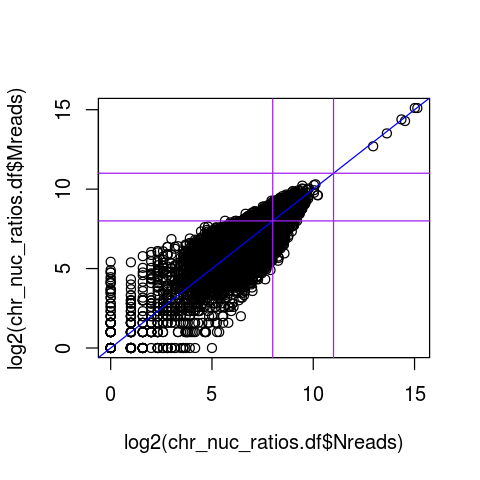

In [15]:
options(repr.plot.width=4, repr.plot.height=4)

plot(log2(chr_nuc_ratios.df$Nreads), log2(chr_nuc_ratios.df$Mreads))
abline(0,1, col="blue")
abline(h=8,v=8,col="purple")
abline(h=11,v=11,col="purple")

In [16]:
#NORMALIZING 
#1 get rid of outliers
rem <- (which(log2(chr_nuc_ratios.df$Nreads) > 11))

chr_nuc_ratios.df <- chr_nuc_ratios.df[-rem,]


In [17]:

mean((chr_nuc_ratios.df$Mreads))
mean((chr_nuc_ratios.df$Nreads))
#normalizing by ratio of total reads in Mature to nascent 
(mean(chr_nuc_ratios.df$Mreads)/mean(chr_nuc_ratios.df$Nreads))

chr_nuc_ratios.df$Nnreads <- chr_nuc_ratios.df$Nreads *(mean(chr_nuc_ratios.df$Mreads)/mean(chr_nuc_ratios.df$Nreads))


[1] 158.5047

[1] 176.1229

[1] 0.8999667

In [18]:
#normalizing by reads in highly positioned nucleosomes
ss <- chr_nuc_ratios.df[which(log2(chr_nuc_ratios.df$Nreads) > 8 & log2(chr_nuc_ratios.df$Mreads) > 8),]

chr_nuc_ratios.df$Nnormreads <- (chr_nuc_ratios.df$Nreads)*(mean(ss$Mreads)/mean(ss$Nreads))
                                 

In [19]:
(mean(ss$Mreads)/mean(ss$Nreads))

[1] 0.999074

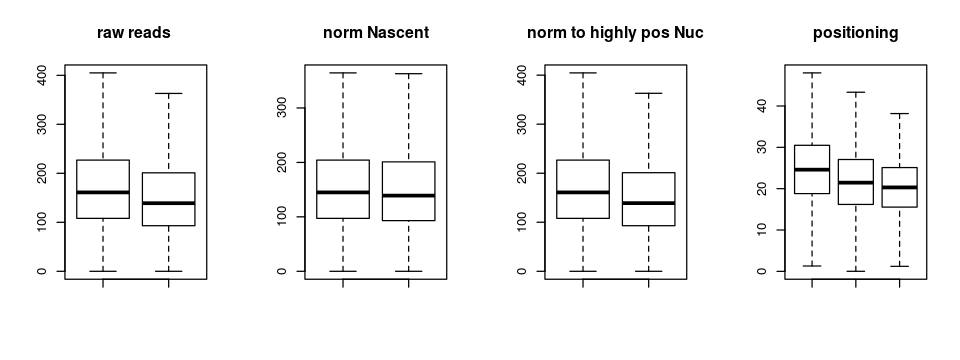

In [21]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,4))
boxplot((chr_nuc_ratios.df$Nreads), (chr_nuc_ratios.df$Mreads),outline=F, main="raw reads ")

boxplot((chr_nuc_ratios.df$Nnreads), (chr_nuc_ratios.df$Mreads),outline=F, main="norm Nascent")

boxplot((chr_nuc_ratios.df$Nnormreads), (chr_nuc_ratios.df$Mreads),outline=F, main="norm to highly pos Nuc")

boxplot(chr_nuc_ratios.df$Nnuc_mdpAv, chr_nuc_ratios.df$Mnuc_mdpAv, chr_nuc_ratios.df$Bnuc_mdpAv, 
       outline=F, main="positioning")

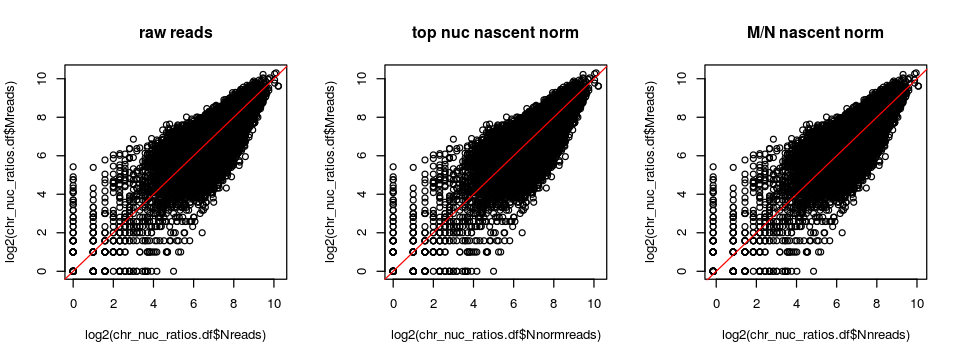

In [24]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,3))
plot(log2(chr_nuc_ratios.df$Nreads), log2(chr_nuc_ratios.df$Mreads), main="raw reads")
abline(0,1, col="red")
plot(log2(chr_nuc_ratios.df$Nnormreads), log2(chr_nuc_ratios.df$Mreads), main="top nuc nascent norm")
abline(0,1, col="red")
plot(log2(chr_nuc_ratios.df$Nnreads), log2(chr_nuc_ratios.df$Mreads), main="M/N nascent norm")
abline(0,1, col="red")

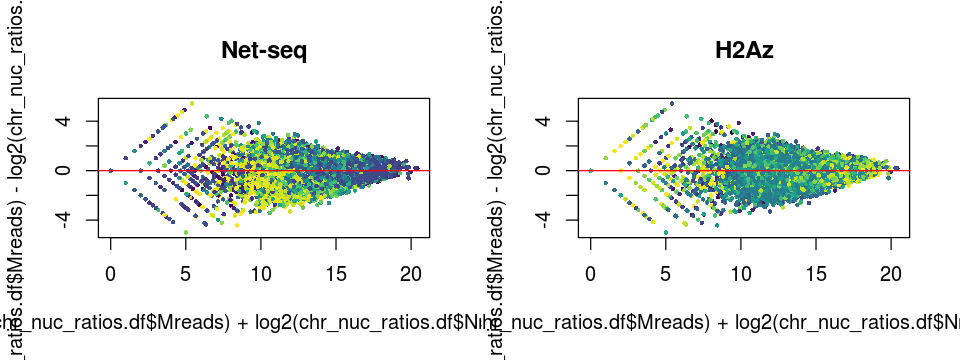

In [26]:
options(repr.plot.width=8, repr.plot.height=3)

par(mfrow=c(1,2))
n = nrow(chr_nuc_ratios.df)

cg <- viridis(n, alpha = 1, begin = 0, end = 1, option = "D")

plot(log2(chr_nuc_ratios.df$Mreads) + log2(chr_nuc_ratios.df$Nnormreads),
    log2(chr_nuc_ratios.df$Mreads) - log2(chr_nuc_ratios.df$Nnormreads),
      pch=16, cex=0.5,  col=cg[order(order(log2(chr_nuc_ratios.df$NET_seq)))], 
    main= "Net-seq")
abline(h=0, col="red", lwd=1)

plot(log2(chr_nuc_ratios.df$Mreads) + log2(chr_nuc_ratios.df$Nnormreads),
    log2(chr_nuc_ratios.df$Mreads) - log2(chr_nuc_ratios.df$Nnormreads),
      pch=16, cex=0.5,  col=cg[order(order(log2(chr_nuc_ratios.df$h2az)))], 
    main= "H2Az")
abline(h=0, col="red", lwd=1)



In [452]:
pc <- chr_nuc_ratios.df[which((log2(chr_nuc_ratios.df$Mreads) + log2(chr_nuc_ratios.df$Nnormreads)) > 8),]

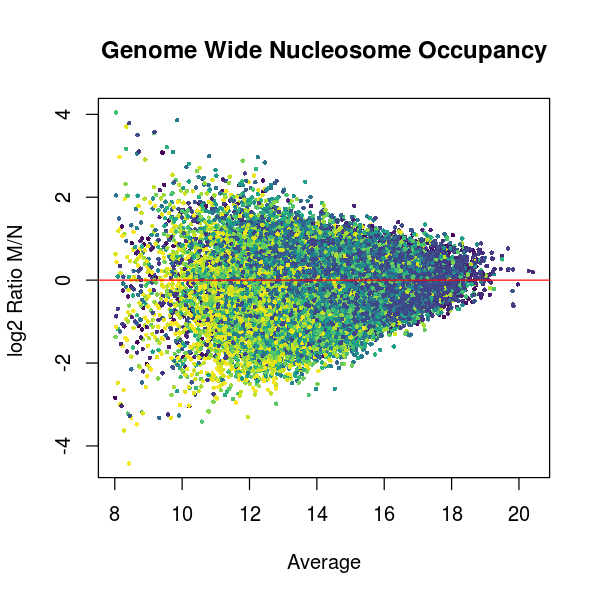

In [459]:
options(repr.plot.width=5, repr.plot.height=5)

n = nrow(pc)

cg <- viridis(n, alpha = 1, begin = 0, end = 1, option = "D")

plot(log2(pc$Mreads) + log2(pc$Nnormreads),
    log2(pc$Mreads) - log2(pc$Nnormreads),
      pch=16, cex=0.5,  col=cg[order(order(log2(pc$NET_seq+1)))], 
    main= "Genome Wide Nucleosome Occupancy", ylab="log2 Ratio M/N ", xlab="Average")
abline(h=0, col="red", lwd=1)


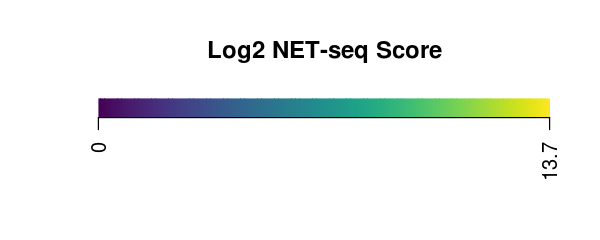

In [464]:
options(repr.plot.width=5, repr.plot.height=2)
image(1:n, 2, as.matrix(1:n), col = viridis(n, option = "D"),xlab='',ylab = "", xaxt = "n", 
      yaxt = "n", bty = "n", main = "Log2 NET-seq Score")
axis(1, at=seq(1,n,length.out=2 ), labels=c(0,13.7) , las= 2 )


In [460]:
range(log2(pc$NET_seq +1))

[1]  0.00000 13.71111

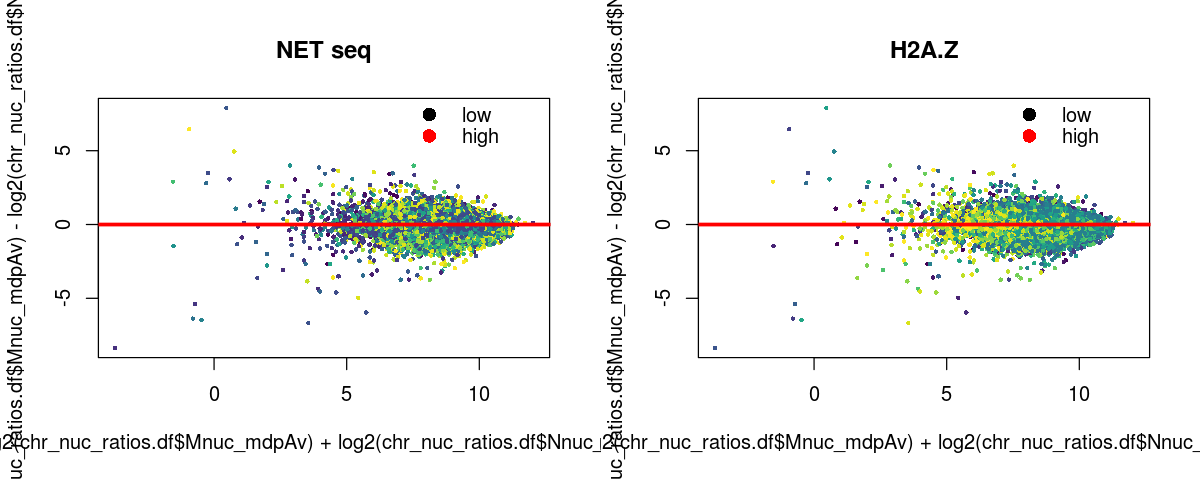

In [63]:
options(repr.plot.width=10, repr.plot.height=4)

n = nrow(chr_nuc_ratios.df)
cg <- viridis(n, alpha = 1, begin = 0, end = 1, option = "D")

par(mfrow=c(1,2))
plot(log2(chr_nuc_ratios.df$Mnuc_mdpAv) + log2(chr_nuc_ratios.df$Nnuc_mdpAv),
    log2(chr_nuc_ratios.df$Mnuc_mdpAv) - log2(chr_nuc_ratios.df$Nnuc_mdpAv),
     col=cg[order(order(log2(chr_nuc_ratios.df$NET_seq)))],
      pch=16, cex=0.5, main="NET seq")

legend("topright", col=c(1,n), c("low", "high"),pch=c(16,16), pt.cex=1.5,cex=1, 
       bty = "n", y.intersp=2, x.intersp=1)

abline(h=0, col="red", lwd=3)

plot(log2(chr_nuc_ratios.df$Mnuc_mdpAv) + log2(chr_nuc_ratios.df$Nnuc_mdpAv),
    log2(chr_nuc_ratios.df$Mnuc_mdpAv) - log2(chr_nuc_ratios.df$Nnuc_mdpAv),
     col=cg[order(order(log2(chr_nuc_ratios.df$h2az)))],
      pch=16, cex=0.5, main="H2A.Z")

legend("topright", col=c(1,n), c("low", "high"),pch=c(16,16), pt.cex=1.5,cex=1, 
       bty = "n", y.intersp=2, x.intersp=1)

abline(h=0, col="red", lwd=3)

In [28]:
chr_nuc_ratios.df$normreadratioMN <-(as.numeric(chr_nuc_ratios.df[,'Mreads'])/as.numeric(chr_nuc_ratios.df[,"Nnormreads"]))
top <- subset(chr_nuc_ratios.df, normreadratioMN >= quantile(normreadratioMN, 0.90, na.rm=T))
bottom <- subset(chr_nuc_ratios.df,  normreadratioMN <= quantile(normreadratioMN, 0.10,na.rm=T))


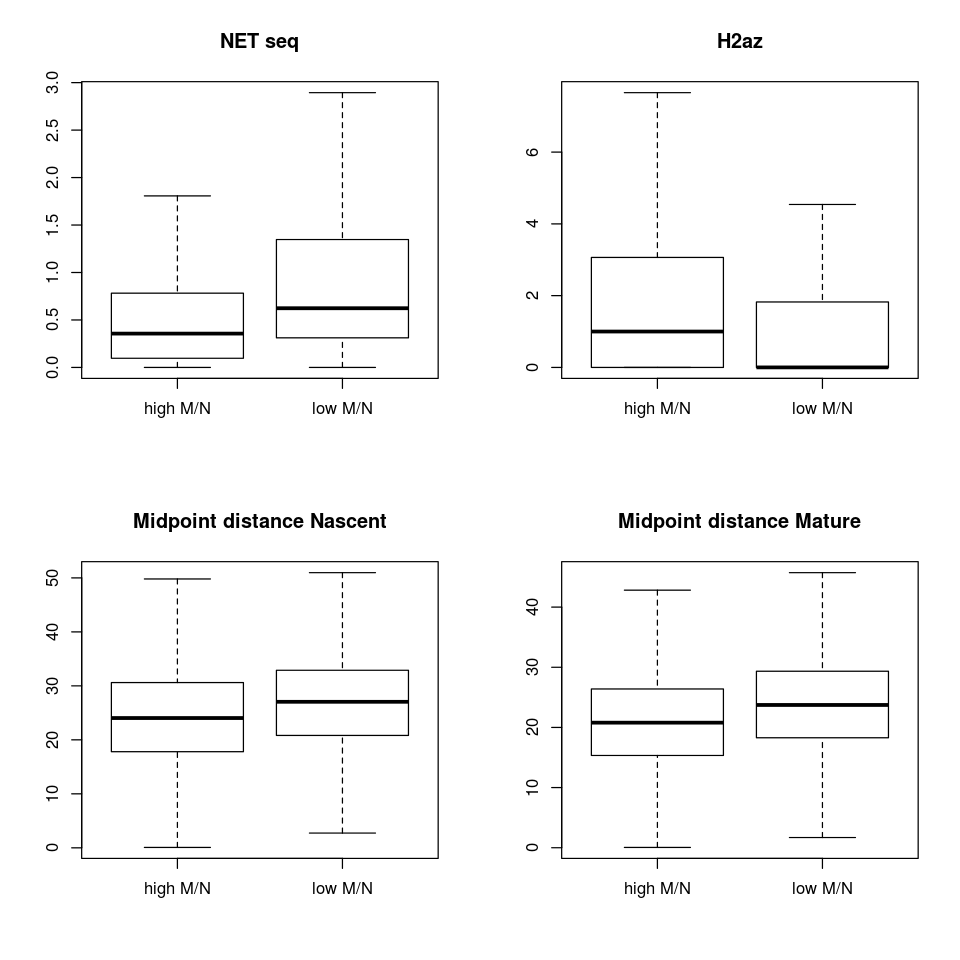

In [30]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
boxplot(top$NET_seq, bottom$NET_seq, outline=F, main="NET seq", names=c("high M/N", "low M/N"))
boxplot(top$h2az, bottom$h2az, na.rm = T, outline=F, main="H2az", names=c("high M/N", "low M/N"))
boxplot(top$Nnuc_mdpAv, bottom$Nnuc_mdpAv, outline=F, main="Midpoint distance Nascent", names=c("high M/N", "low M/N"))
boxplot(top$Mnuc_mdpAv, bottom$Mnuc_mdpAv, outline=F, main="Midpoint distance Mature", names=c("high M/N", "low M/N"))

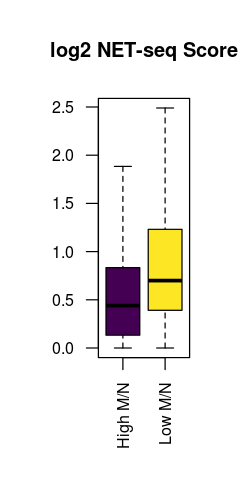

In [489]:
options(repr.plot.width=2, repr.plot.height=4)
cg <- viridis(2, alpha = 1, begin = 0, end = 1, option = "D")

boxplot(log2(top$NET_seq+1), log2(bottom$NET_seq+1), outline=F, main="log2 NET-seq Score", 
        names=c("High M/N", "Low M/N"), col=c(cg[1], cg[2]), las=2, cex.main=1, cex.axis=0.8)


In [38]:
h <- which(chr_nuc_ratios.df$h2az != 0)

In [56]:
h.df <- chr_nuc_ratios.df[which(chr_nuc_ratios.df[h,"h2az"] > 30),]

In [68]:
a.df <- chr_nuc_ratios.df[-(which(chr_nuc_ratios.df[h,"h2az"] > 30)),]
idx <-  sample(nrow(a.df), 1212)
as.df <- chr_nuc_ratios.df[idx,] 

In [105]:
z.df <- a.df[-(which(a.df$h2az == 0)),]

In [106]:
nrow(z.df)

[1] 36560

In [74]:
summary(chr_nuc_ratios.df$h2az)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   3.354   2.981 419.300 

In [1]:
plot(log2(chr_nuc_ratios.df$Mreads),log2(chr_nuc_ratios.df$h2az))

ERROR: Error in plot(log2(chr_nuc_ratios.df$Mreads), log2(chr_nuc_ratios.df$h2az)): object 'chr_nuc_ratios.df' not found


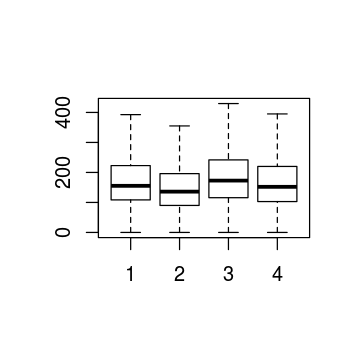

In [116]:
options(repr.plot.width=3, repr.plot.height=3)

boxplot(h.df$Nnormreads, h.df$Mreads, z.df$Nnormreads, z.df$Mreads, outline=F )

In [77]:
cn.df <- chr_nuc_ratios.df

In [118]:
ztop <- subset(z.df, h2az >= quantile(h2az , 0.90, na.rm=T))
zbottom <- subset(z.df, h2az <= quantile(h2az , 0.10,na.rm=T))


In [125]:
range(ztop$h2az)
range(zbottom$h2az)

[1]  15.03141 419.06214

[1] 1 1

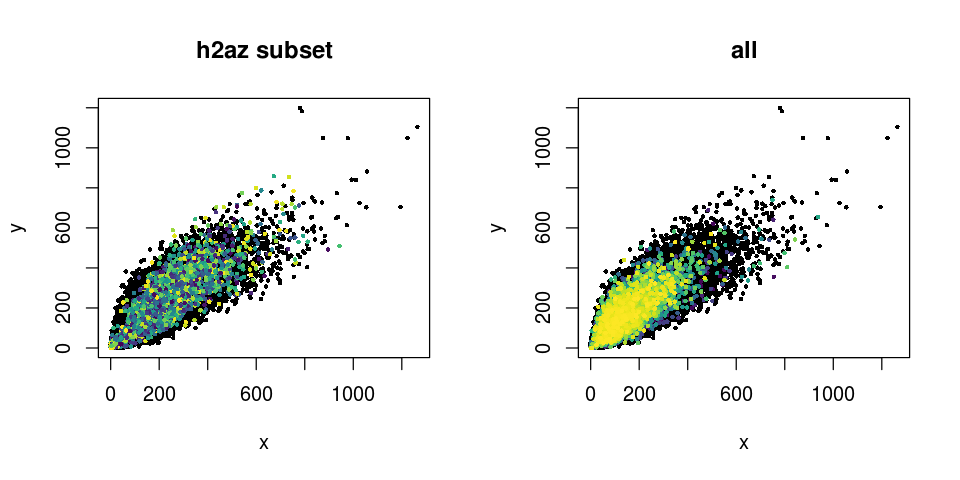

In [126]:
options(repr.plot.width=8, repr.plot.height=4) #, then use par(mfrow) to adjust number of rows and col for plots
par(mfrow=c(1,2))

variable<- ztop$h2az
variable2<- zbottom$h2az
y <- cn.df$Nnormreads
x <- cn.df$Mreads

lbl="h2az"

#color ramp with viridis package
cg <- viridis(nrow(ztop), alpha = 1, begin = 0, end = 1, option = "D")
cg1 <- viridis(nrow(zbottom), alpha = 1, begin = 0, end = 1, option = "D")

#in plot command -- note the double order
plot(x, y, pch=16, cex = 0.5, main="h2az subset")
points(ztop$Mreads,ztop$Nnormreads,col=cg[order(order(variable))], pch=16,cex = 0.5)

plot(x,y, pch=16,cex = 0.5, main="all")
points(zbottom$Mreads,zbottom$Nnormreads,col=cg1[order(order(variable2))], pch=16,cex = 0.5)


In [160]:
index_file <- file_of_interest.df
genes.gr = GRanges(seqnames= index_file$chr, ranges = IRanges(start =(index_file$start), 
                                                    end = (index_file$end)),
                  strand = index_file$strand)


#create a new GenomicRanges object using the chromosome length midpoint information 
peaks.gr = GRanges(seqnames = cn.df[,"chr"],
                   ranges = IRanges(start =  cn.df[,"nuc_peaks"],
                                    width = 1))
#find the overlaping positions between the midpoints and the feature coordinates. 
rangtss.gr = findOverlaps(peaks.gr,genes.gr)

#convert to a data.frame, will use this as the index for the 
gene_nucs.df <- as.data.frame(rangtss.gr)

In [157]:
pos_nucs.df <- cn.df[gene_nucs_POS.df[,1],]
neg_nucs.df <- cn.df[gene_nucs_NEG.df[,1],]

In [170]:
intergenic.df <- cn.df[-(gene_nucs.df[,1]),]
genic.df <- cn.df[(gene_nucs.df[,1]),]

In [171]:
nrow(intergenic.df)
nrow(genic.df)
nrow(cn.df)

[1] 14529

[1] 52017

[1] 65578

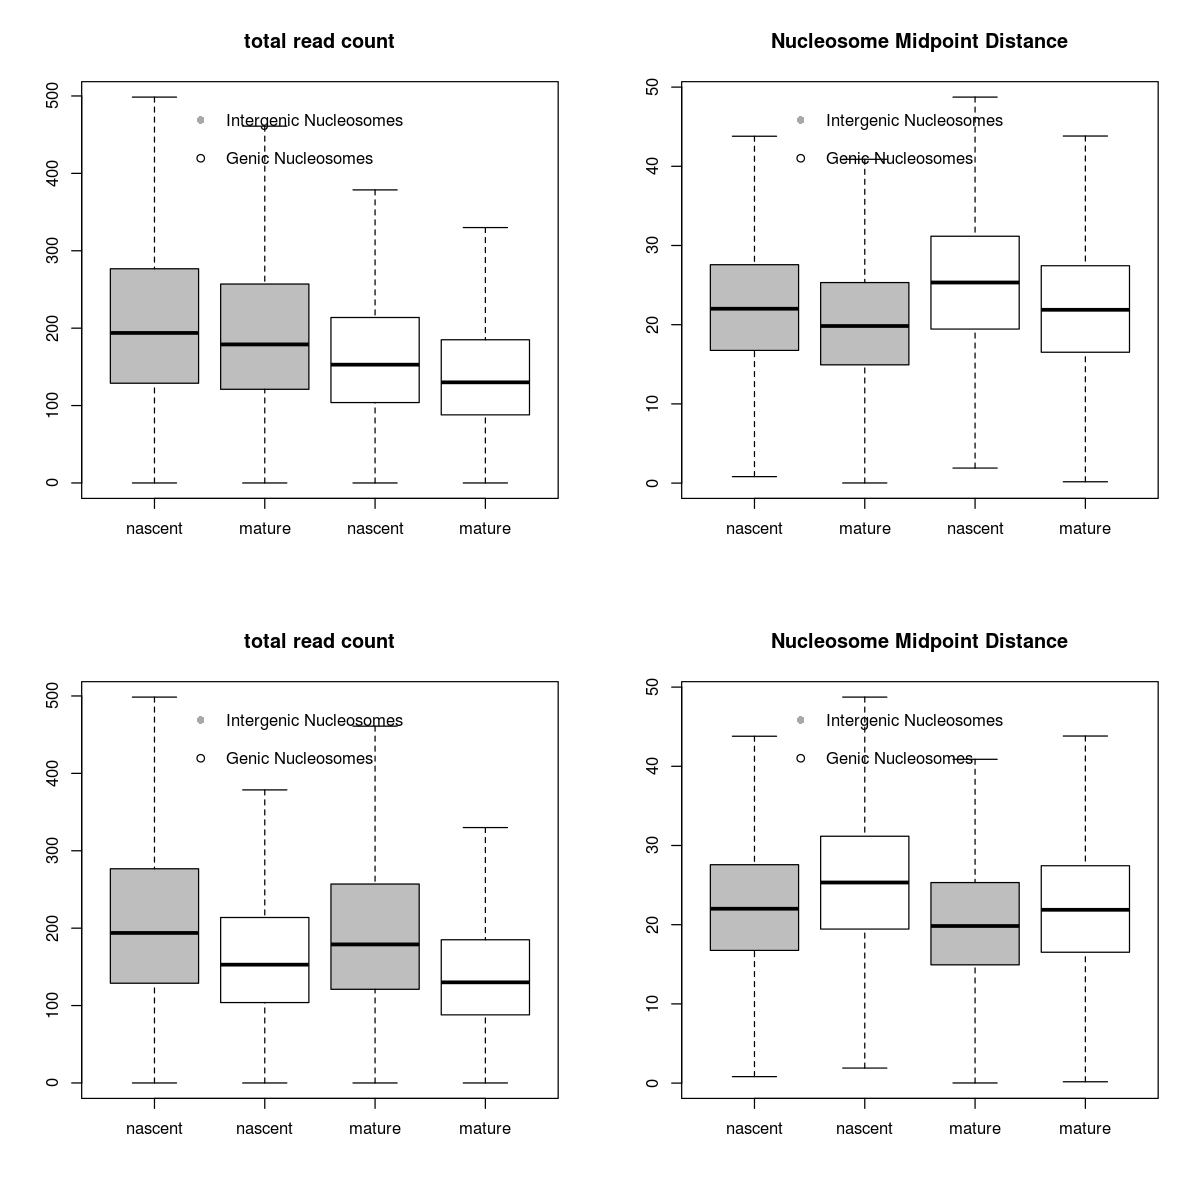

In [231]:
options(repr.plot.width=10, repr.plot.height=10)

par(mfrow=c(2,2))
boxplot(intergenic.df$Nnormreads, intergenic.df$Mreads, genic.df$Nnormreads, genic.df$Mreads, outline=F,
      names=c("nascent","mature", "nascent",  "mature"), main="total read count", 
       col=c("gray", "gray", "white", "white"))
legend("topright", col=c("dark gray","black"), c("Intergenic Nucleosomes", "Genic Nucleosomes"),pch=c(16,1),
      pt.cex=1,cex=1, bty = "n")#, y.intersp=2, x.intersp=1)
    
boxplot(intergenic.df$Nnuc_mdpAv, intergenic.df$Mnuc_mdpAv., genic.df$Nnuc_mdpAv, genic.df$Mnuc_mdpAv., outline=F,
        names=c("nascent","mature", "nascent",  "mature"), main="Nucleosome Midpoint Distance", 
       col=c("gray", "gray", "white", "white"))
legend("topright", col=c("dark gray","black"), c("Intergenic Nucleosomes", "Genic Nucleosomes"),pch=c(16,1),
      pt.cex=1,cex=1, bty = "n")
    
boxplot(intergenic.df$Nnormreads, genic.df$Nnormreads, intergenic.df$Mreads, genic.df$Mreads, outline=F,
       names=c("nascent","nascent", "mature",  "mature"), main="total read count", 
       col=c("gray", "white", "gray", "white"))
legend("topright", col=c("dark gray","black"), c("Intergenic Nucleosomes", "Genic Nucleosomes"),pch=c(16,1),
      pt.cex=1,cex=1, bty = "n")#, y.intersp=2, x.intersp=1)
    
boxplot(intergenic.df$Nnuc_mdpAv, genic.df$Nnuc_mdpAv, intergenic.df$Mnuc_mdpAv., genic.df$Mnuc_mdpAv., outline=F,
       names=c("nascent","nascent", "mature",  "mature"), main="Nucleosome Midpoint Distance", 
       col=c("gray", "white","gray",  "white"))
legend("topright", col=c("dark gray","black"), c("Intergenic Nucleosomes", "Genic Nucleosomes"),pch=c(16,1),
      pt.cex=1,cex=1, bty = "n")
    

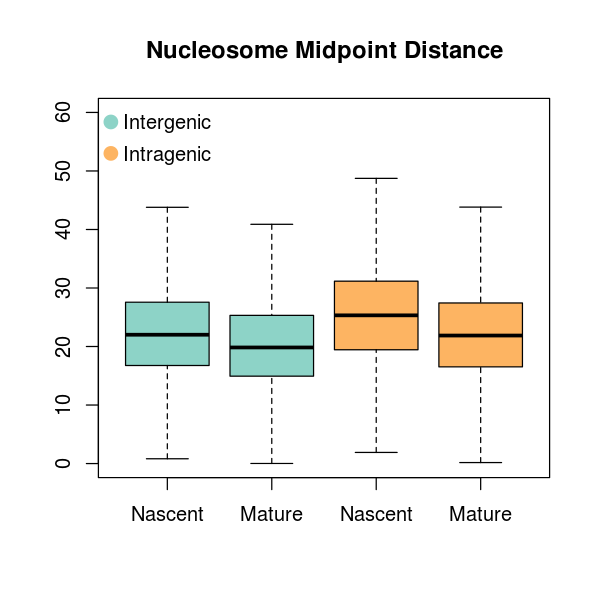

In [469]:
options(repr.plot.width=5, repr.plot.height=5)

cl <- brewer.pal(12, "Set3")
boxplot(intergenic.df$Nnuc_mdpAv, intergenic.df$Mnuc_mdpAv., genic.df$Nnuc_mdpAv, genic.df$Mnuc_mdpAv., outline=F,
        names=c("Nascent","Mature", "Nascent",  "Mature"), main="Nucleosome Midpoint Distance", 
       col=c(cl[1], cl[1],cl[6],cl[6]), ylim=c(0,60))
legend("topleft", col=c(cl[1],cl[6]), c("Intergenic", "Intragenic"),pch=c(19,19),
      pt.cex=1.5,cex=1, bty = "n", y.intersp=2, x.intersp=1)
 

In [ ]:
cl <- brewer.pal(12, "Paired")
plot(density(chr_nuc_ratios.df$Bnuc_mdpAv, na.rm = T), col=cl[10], lwd="3", main=" ",
     xlab="Distance from Nucleosome Midpoint", xlim=c(0,60))
lines(density(chr_nuc_ratios.df$Mnuc_mdpAv., na.rm = T), col=cl[6], lwd="3")
lines(density(chr_nuc_ratios.df$Nnuc_mdpAv, na.rm = T), col=cl[4],lwd="3")
legend('topleft', col=c(cl[4], cl[6],cl[10]), c("Nascent", "Mature", "Bulk"),pch=c(16,16),
        pt.cex=1.5,cex=1, 
       bty = "n", y.intersp=2, x.intersp=1)

In [281]:
ttop <- subset(genic.df, NET_seq >= quantile(NET_seq , 0.90, na.rm=T))
tbottom <- subset(genic.df,NET_seq <= quantile(NET_seq , 0.10,na.rm=T))


In [282]:
ttop2 <- ttop[order(ttop$NET_seq, decreasing=T),] 
ttop200 <- ttop2[1:200,] 
tbottom2 <- tbottom[order(tbottom$NET_seq, decreasing=F),] 
tbottom200 <- tbottom2[1:200,] 

In [268]:
nrow(tbottom)

[1] 2606

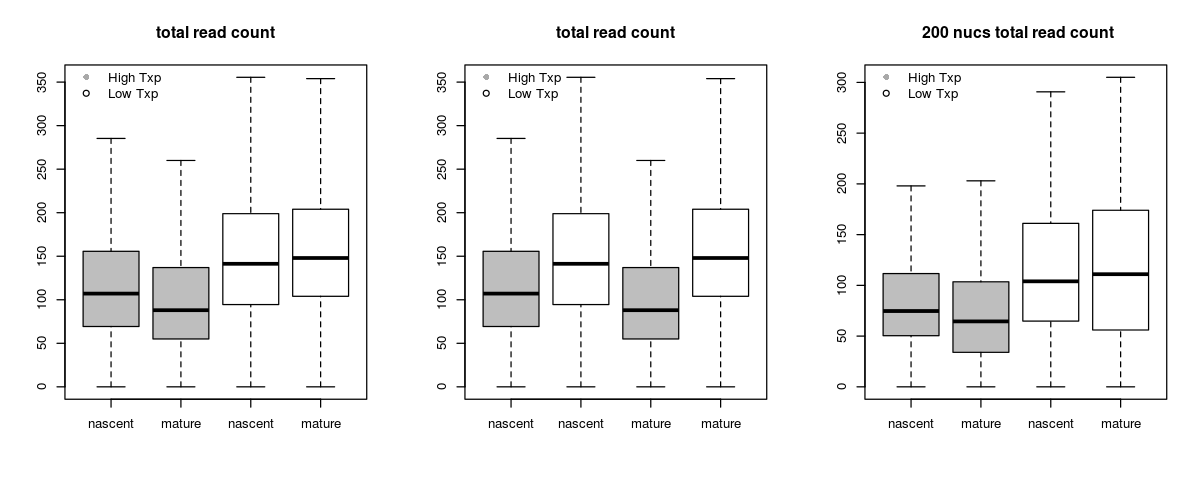

In [283]:
options(repr.plot.width=10, repr.plot.height=4)

par(mfrow=c(1,3))
boxplot(ttop$Nnreads, ttop$Mreads, tbottom$Nnreads, tbottom$Mreads, outline=F,
      names=c("nascent","mature", "nascent",  "mature"), main="total read count", 
       col=c("gray", "gray", "white", "white"))
legend("topleft", col=c("dark gray","black"), c("High Txp", "Low Txp"),pch=c(16,1),
      pt.cex=1,cex=1, bty = "n", y.intersp=2, x.intersp=1)
    
boxplot(ttop$Nnreads, tbottom$Nnreads,ttop$Mreads, tbottom$Mreads, outline=F,
     names=c("nascent","nascent", "mature",  "mature"), main="total read count", 
       col=c("gray", "white",  "gray","white"))
legend("topleft", col=c("dark gray","black"), c("High Txp", "Low Txp"),pch=c(16,1),
      pt.cex=1,cex=1, bty = "n", y.intersp=2, x.intersp=1)
    
boxplot(ttop200$Nnreads, ttop200$Mreads, tbottom200$Nnreads, tbottom200$Mreads, outline=F,
      names=c("nascent","mature", "nascent",  "mature"), main=" 200 nucs total read count", 
       col=c("gray", "gray", "white", "white"))
legend("topleft", col=c("dark gray","black"), c("High Txp", "Low Txp"),pch=c(16,1),
      pt.cex=1,cex=1, bty = "n", y.intersp=2, x.intersp=1)



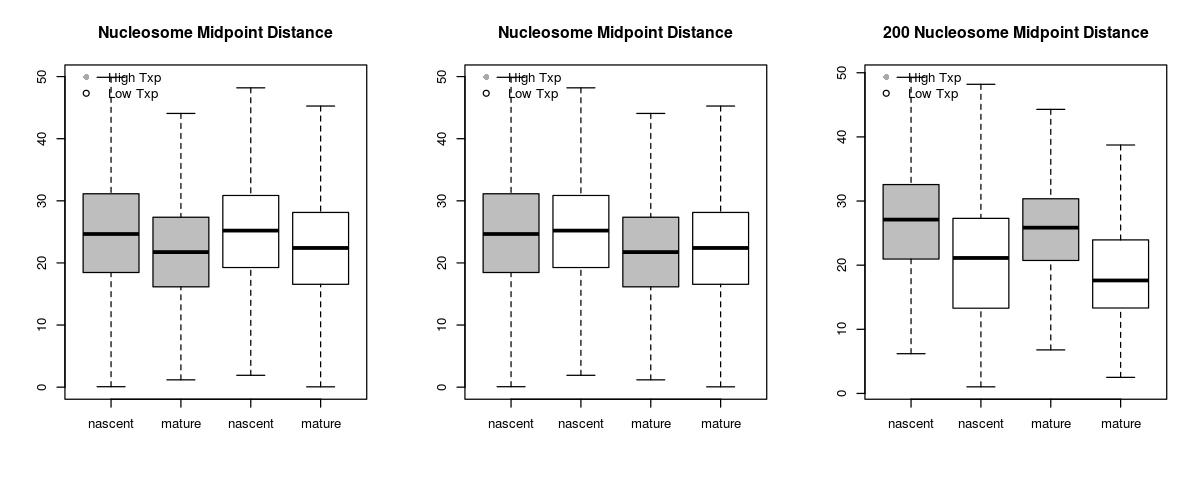

In [285]:
options(repr.plot.width=10, repr.plot.height=4)

par(mfrow=c(1,3))

boxplot(ttop$Nnuc_mdpAv, ttop$Mnuc_mdpAv., tbottom$Nnuc_mdpAv, tbottom$Mnuc_mdpAv., outline=F,
      names=c("nascent","mature", "nascent",  "mature"), main="Nucleosome Midpoint Distance", 
       col=c("gray", "gray", "white", "white"))
legend("topleft", col=c("dark gray","black"), c("High Txp", "Low Txp"),pch=c(16,1),
      pt.cex=1,cex=1, bty = "n", y.intersp=2, x.intersp=1)

    
boxplot(ttop$Nnuc_mdpAv, tbottom$Nnuc_mdpAv,ttop$Mnuc_mdpAv., tbottom$Mnuc_mdpAv., outline=F,
      names=c("nascent","nascent", "mature",  "mature"), main="Nucleosome Midpoint Distance", 
       col=c("gray", "white", "gray","white"))
legend("topleft", col=c("dark gray","black"), c("High Txp", "Low Txp"),pch=c(16,1),
      pt.cex=1,cex=1, bty = "n", y.intersp=2, x.intersp=1)

boxplot(ttop200$Nnuc_mdpAv, tbottom200$Nnuc_mdpAv,ttop200$Mnuc_mdpAv., tbottom200$Mnuc_mdpAv., outline=F,
      names=c("nascent","nascent", "mature",  "mature"), main="200 Nucleosome Midpoint Distance", 
       col=c("gray", "white", "gray","white"))
legend("topleft", col=c("dark gray","black"), c("High Txp", "Low Txp"),pch=c(16,1),
      pt.cex=1,cex=1, bty = "n", y.intersp=2, x.intersp=1)

    

In [ ]:
#plot_typhoon_density_function <- function(CHROM, pks , chrs) {
options(scipen=999) #disabling scientific notation 1= "230218",
chr_coordinates.df = data.frame(chr=(c("chrI", "chrII", "chrIII", "chrIV", "chrV", "chrVI", "chrVII", "chrVIII", "chrIX", "chrX", "chrXI", "chrXII",
                                       "chrXIII", "chrXIV", "chrXV","chrXVI")),
                                end=as.numeric(c("230218","813184", "316620", "1531933", "576874", "270161", "1090940", "562643", "439888", "745751", "666816", "1078177", "924431", "784333", "1091291", "948066")), stringsAsFactors=FALSE)
chrs="chrXV"  
#pks=340615
CHROM=15
chr_end=chr_coordinates.df[CHROM,2]

# XV 311342..312367

  #setting up parameters
  chr = chrs
  
  new_start= 311342 - 2000
  new_end= 312367 + 2000
 
dsN = vector("list")
dsM = vector("list")
dsB = vector("list")
data=vector("list")
datad=vector("list")


  source('/data/home/mpg22/scripts/create_typhoon_plot_functions_sacCer3genetablemodified_xlimmodified.R')
  
  #raw file names without extensions (.bam or .bam.bai)
  #organize here in the order in which want them to show in the plot from left to right.
  
  #bam file names
  file_name = c("dm764_756_merged_10minpulse_nascent_m",
                "dm765_757_merged_10minpulse_mature_m","DM767_m1") #"DM526"
  
  
  #to normalize the read files that will be compared, (determine number of reads using samtools) set up these parametters these reads dont contain chr12 or chrM,  
  #reference_No_reads= 26000000
  #actual_No_reads = c(31564827,25837354, 21449631)#26394871 #nascent, mature, and bulk
  
  #individual plot title names, in same order as in the file_name
  plot_title_1 = "Nascent"
  plot_title_2 = "Mature"   
  plot_title_3 = "Bulk"
  
  
  #define the read boudaries (nucleosomal and/or subnucleosomal)
  length_min = 20
  length_max = 250

  d_min = 140
  d_max = 180
  
  #make matrix, a column for each fragment read length                       
  matx.m = matrix(0, nrow=250, ncol=(new_end-new_start)+1)
  
  # this is  to create a list of matrices to be able to call them individually later on.
  data = vector("list")
  # Set the storage list  for nucleosome schematic
  nuc_pks.l = vector("list")
  
  chr.gr = GRanges(seqnames= chr, ranges = IRanges(start =new_start , end = new_end ))
  
  p = ScanBamParam(what = c("rname", "strand", "pos", "isize"),which = chr.gr)
  
  for (f in 1:2){
    
    #data files
    file_name.bam = (paste("/data/home/mpg22/March_2017_chromatin_assembly/Merged_data/final_merged_files/",file_name[f],".bam", sep=''))
    file_name.bam.bai = paste("/data/home/mpg22/March_2017_chromatin_assembly/Merged_data/final_merged_files/",file_name[f],".bam.bai",sep='')
    
    #data files
    #file_name.bam = paste("/data/illumina_pipeline/aligned_experiments/",file_name[f],"/",file_name[f],file_extension[f],".bam", sep='')
    #file_name.bam.bai = paste("/data/illumina_pipeline/aligned_experiments/",file_name[f],"/",file_name[f],file_extension[f],".bam.bai",sep='')
    
    A_reads.l = scanBam(file = file_name.bam,
                        index = file_name.bam.bai,
                        param = p)
    
    #All the information from the range is in the first entry of the output_reads.l list (this can be       accessed by ou$
    # str(output_reads.l[[1]]) to see list structure
    
    #create a new GenomicRanges object for the reads from this list:
    A_reads.gr = GRanges(seqnames = A_reads.l[[1]]$rname,
                         ranges = IRanges(start = A_reads.l[[1]]$pos,
                                          width = A_reads.l[[1]]$isize))
    
    subset_data.gr = A_reads.gr[which(width(A_reads.gr) > d_min & width(A_reads.gr)< d_max)]
    
    #subset_data.gr = unique(subsetdata.gr)
       #finding the mipoints of those reads. 
    midpoints.gr =IRanges(start=mid(ranges(subset_data.gr)), width=1) 
    
    datad[[f]] = as.data.frame(subset_data.gr)
    midpoints = as.data.frame(midpoints.gr)
    datad[[f]]$mid=midpoints$start
    
      
    #defyning bp coverage.
    mat.gr = GRanges(seqnames = chr, ranges = IRanges(start=new_start:new_end,width=1))
    
    for(i in 20:250){
      subset_data.gr = A_reads.gr[which(width(A_reads.gr)==i)]
      
      start(subset_data.gr) = start(subset_data.gr) + width(subset_data.gr)/4
      end(subset_data.gr) = end(subset_data.gr) - width(subset_data.gr)/4
      
      matx.m[i,]=countOverlaps(mat.gr, subset_data.gr) # if doing just one location  dont need to add onto the matrix from previous locations
      
    }
    data[[f]] <- matx.m#*(reference_No_reads/actual_No_reads[f])
      
      
  }
  band=30 

pk=pks



##change typhoon plot color to green for the subnucleosomal reads. 



In [499]:

  #making the plot
  cat("Creating the plot...\n")
  library(gplots)
  
  options(repr.plot.width=10, repr.plot.height=5)
  scr.m = matrix(c(0.05, 1, 0.91, 1,
                   0.05, 1, 0.505, 0.91,
                   0.05, 1, 0.1, 0.505),
                 ncol = 4, byrow = T
  )
  
  png("~/March_2017_chromatin_assembly/Merged_data//figures/poster_fig45.png", width = 45, height = 25, units = "in", res = 300) ##Open a device for plotting, using png(), bmp(), pdf() 

  # Close the screens
  close.screen(all.screens = T)
  
  split.screen(scr.m)
  
  par(oma = c(1,1, 0, 1)) # make room (i.e. the 4's) for the overall x and y axis titles
  
  zm = 2.5
  
  screen(1)
  par(mar = c(0,4.1,0,2.1), cex=1.5)  # changing the margings order :bottom, left, top, right
  make_gene_schematic(chr, new_start, new_end, proteinCoding = F)#y_low = 0, y_high = 1,
  
  screen(2) 
  par(mar = c(1,0,1,0),  cex=3.5, cex.main=1.5)
  dens_dot_plot(data[[1]],  z_min = 0, z_max = zm, plot_title=plot_title_1, x_axt = "n")
  #abline(v=pk, h=80, col="dark green", lwd=1)
  
  screen(3)
  par(mar =c(1,0,1,0), cex=3.5, cex.main=1.5)
  dens_dot_plot(data[[2]], z_min = 0, z_max = zm, plot_title=plot_title_2, x_axt = "s")
  #abline(v=pk, h=80, col="dark green", lwd=1)
  
  mtext(paste(chr, 'Position', sep=' '), side = 1, outer = TRUE, cex=3.5)
  mtext('Fragment Length (bp)', side = 2, outer = TRUE, cex=3.5)
  cat("\tComplete!\n")
  dev.off()


Creating the plot...


[1] 1 2 3

	Complete!


png 
  2

In [399]:
library(Rsamtools)
library(GenomicRanges)

library(gplots)
library(repr) # library to resize the plots 
library(pastecs)

chr="chrXV" 

  
  new_start= 1
  new_end= chr_coordinates.df[15,2]


#bam file names
file_name = c("dm764_756_merged_10minpulse_nascent_m",
              "dm765_757_merged_10minpulse_mature_m","DM767")

#individual plot title names, in same order as in the file_name
plot_title_1 = "nascent"#"DM741 t=15"
plot_title_2 = "Mature"   #"BulK DM504 (time zero HM)"
plot_title_3 = "Bulk"

#define the read boudaries (nucleosomal or subnucleosomal)
length_min = 140
length_max = 180

# this is  to create a list of matrices to be able to call them individually later on.
data = vector("list")
data.norm=vector('list')
data.m=vector('list')
dif_dens_norm= vector("list")


band = 20
#make matrix, a column for each position at base pair coverage.. rows for each binding site 
matx.m = matrix(0, nrow=nrow(index_file), ncol = 1601) #define outside loop, nrow= total number of file binding sites. 
  
  
  chr.gr = GRanges(seqnames= chr, ranges = IRanges(start =new_start , end = new_end ))
  
  p = ScanBamParam(what = c("rname", "strand", "pos", "isize"),which = chr.gr)
 
  
  for (f in 1:3){
    
    #data files
    file_name.bam = (paste("/data/home/mpg22/March_2017_chromatin_assembly/Merged_data/final_merged_files/",file_name[f],".bam", sep=''))
    file_name.bam.bai = paste("/data/home/mpg22/March_2017_chromatin_assembly/Merged_data/final_merged_files/",file_name[f],".bam.bai",sep='')
    
  A_reads.l = scanBam(file = file_name.bam, 
                      index = file_name.bam.bai,
                      param = p)
  
  #All the information from the range is in the first entry of the output_reads.l list (this can be accessed by output_reads.l[[1]]).
  # str(output_reads.l[[1]]) to see list structure
  
  #create a new GenomicRanges object for the reads from this list:
  A_reads.gr = GRanges(seqnames = A_reads.l[[1]]$rname,
                       ranges = IRanges(start = A_reads.l[[1]]$pos, 
                                        width = A_reads.l[[1]]$isize))
  
  #defyning bp coverage.#mat.gr = GRanges(seqnames = chr, ranges = IRanges(start=new_start:new_end,width=1))   
  #bins of every 10 bp to find overlaps with mid points of reads. 
  mat.gr = GRanges(seqnames = chr, ranges = IRanges(start= seq(new_start, new_end, by =1), width=1 ))  
  
  reads = A_reads.gr[which(width(A_reads.gr) >= length_min & width(A_reads.gr) <= length_max)]
  
  ## taking only the midpoint
  subset_data.gr = A_reads.gr[which(width(A_reads.gr) >= length_min & width(A_reads.gr) <= length_max)]
  ranges(subset_data.gr) = IRanges(start=mid(ranges(subset_data.gr)), width=1) 
 
  idx <- as.data.frame(findOverlaps(mat.gr, subset_data.gr))
  midpoints <- as.data.frame(subset_data.gr)
  cdt <- as.data.frame(reads)
  
  data[[f]] <- cdt[idx[,2],]
  data[[f]]$mid<-midpoints$start[idx[,2]]
  
  
}



cat(paste("saving midpoints","\n"))

dm <- data[[2]]$mid
dm1 <- data[[1]]$mid


#The problem was the ex-aqeuos values reported by TP -- it automatically removed 
#these so the indices were off from the original points.
# I do not understand what these values were but they are easy to fix by just using the turnpoints themselves
# we need to take everyother turn point for peaks depending on whether the first value is a peak or not

    #calculate turnpoints PEAKS
  myDensity = density(dm, bw=band, kernel="gaussian", n=(new_end/5))

 myD1= density(dm, bw=band, kernel="gaussian", n=(new_end/5))
myD2= density(dm1, bw=band, kernel="gaussian", n=(new_end/5))

  tp = turnpoints(myDensity$y)
  
  #finding all of the peaks within the range 

  if (tp$firstispeak){
    d_peaks=myDensity$x[tp$tppos[seq(1,max(tp$tppos),by=2)]]
    d_peak_scores=myDensity$y[tp$tppos[seq(1,max(tp$tppos),by=2)]]
    print("first is a peak ")
  } else {
    d_peaks=myDensity$x[tp$tppos[seq(0,max(tp$tppos),by=2)]]
    d_peak_scores=myDensity$y[tp$tppos[seq(0,max(tp$tppos),by=2)]]
    print("first is NOT a peak ")
  }
  
  d_peak_scores[which(is.na(d_peak_scores))]=0
  d_peaks=d_peaks[which(d_peak_scores>1e-8)]


saving midpoints 
[1] "first is a peak "


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"axes" is not a graphical parameter”

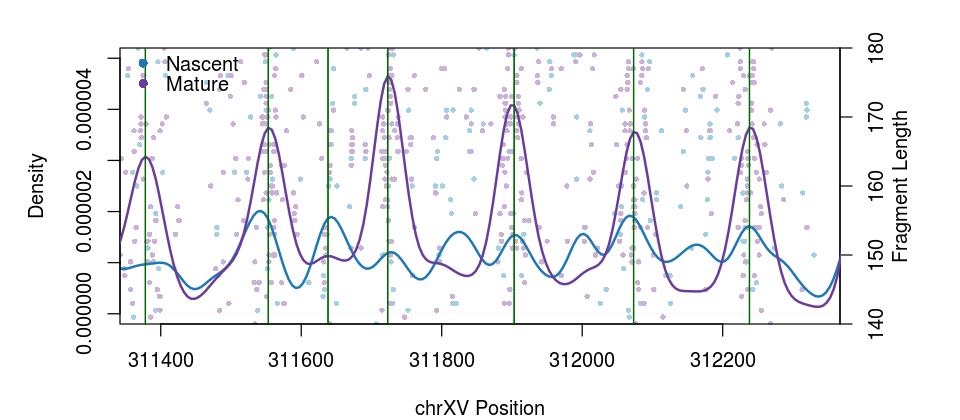

In [474]:
 options(repr.plot.width=8, repr.plot.height=3.5)
cl <- brewer.pal(12, "Paired")
par(mar=c(4,5,2,5))
y_lim = c(0,0.000009)

x_lim= c((311342),(312367))

plot(data[[1]]$mid,data[[1]]$width, cex=0.6,pch=16,axes=F, xlab= "chrXV Position", ylab=NA, col=cl[1],  xaxs="i",yaxs="i",xlim=x_lim)
points(data[[2]]$mid,data[[2]]$width,  cex=0.6,pch=16,axes=F,col=cl[9],  xaxs="i",yaxs="i",xlim=x_lim)
axis(side = 4)
mtext(side = 4, line=2, cex=1,'Fragment Length')

abline(v=d_peaks, col="dark green", pch=16, cex=0.5) 

par(new=T)
plot(myD2,type='l', ylim= c(0,0.000005), col=cl[2],xlab=' ',xaxs="i", lwd=2,xlim=x_lim, main= '')
lines(myD1,type='l', xlab=' ',xaxs="i", col=cl[10], lwd=2,xlim=x_lim)
abline(v=d_peaks, col="dark green", pch=16, cex=0.5)  

legend("topleft", col=c(cl[2], cl[10]), c("Nascent", "Mature"),pch=c(16,16),
      pt.cex=1,cex=1, bty = "n", y.intersp=2, x.intersp=1)

#fc8d59 and #91bfdb